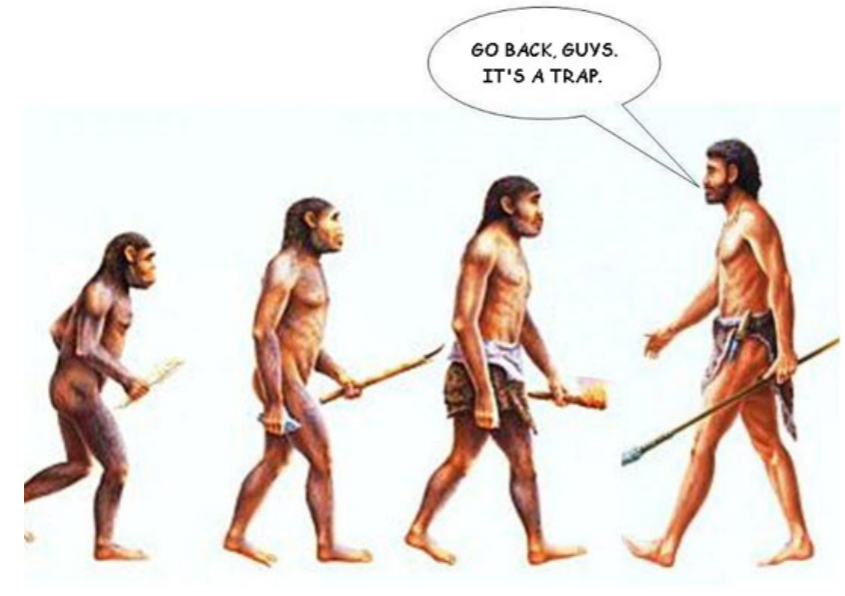

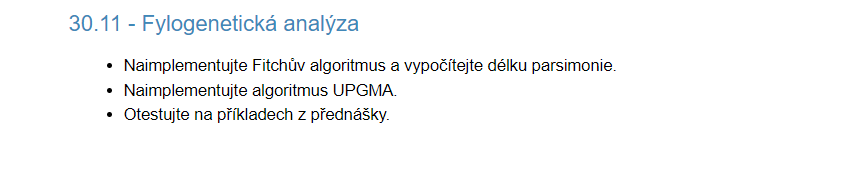

- Předpoklad, že máme tabulku jen udělat průchod dolů a nahoru

- Sestavit stomek pomocí UPGMA 

# Konfigurace a importy

In [277]:
import pandas as pd
import numpy as np
import itertools

# Fitchův algoritmus


- Předpoklad, že máme k dispozici tento strom
- Projít nahoru a dolů

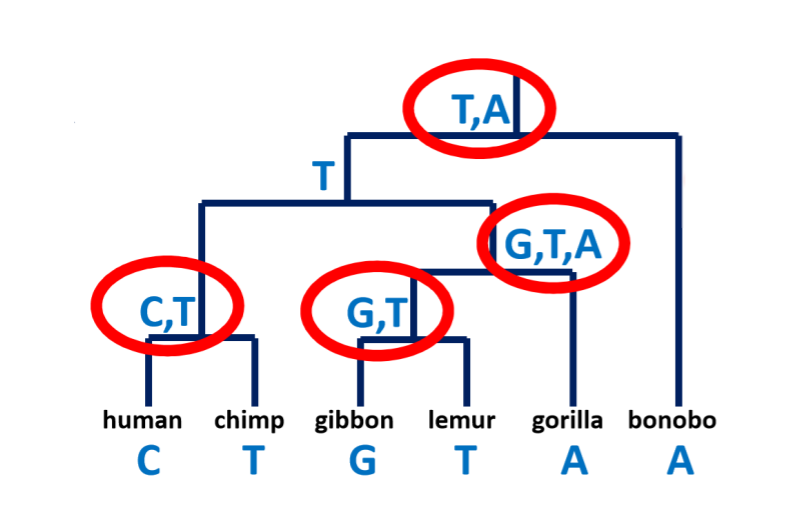

In [279]:
class Tree_Flitch:
    def __init__(self):
        pass
    
    def build(self, leafs):
        print(leafs)
    
    
    

In [280]:
flitch = Tree_Flitch()

In [281]:
flitch.build([('C', 'T'), ('G', 'T'), ('A', 'A')])

[('C', 'T'), ('G', 'T'), ('A', 'A')]


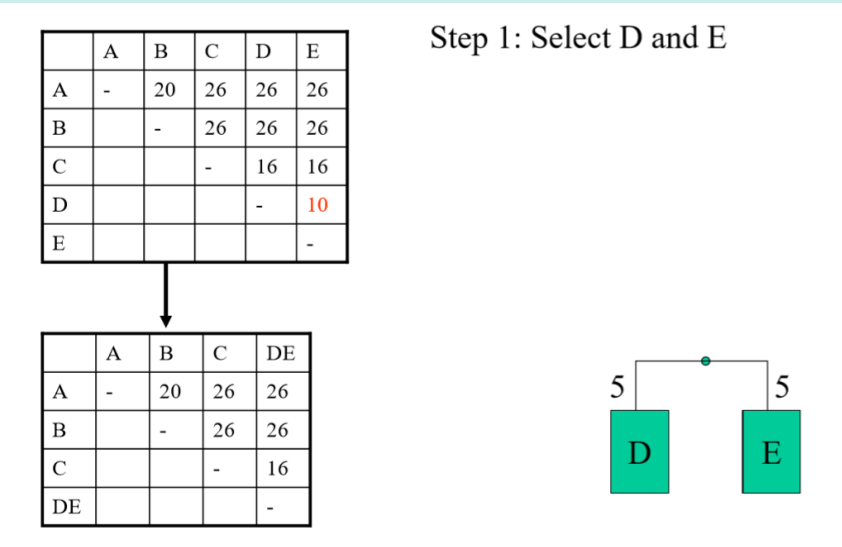

In [56]:
matrix = [
    [np.inf, 20, 26, 26, 26],                      #A
    [20, np.inf, 26, 26, 26],                       #B
    [26, 26, np.inf, 16, 16],                        #C
    [26, 26, 16, np.inf, 10],                         #D
    [26, 26, 16, 10, np.inf],                          #E
]

In [57]:
labels = ['A', 'B', 'C', 'D', 'E']

In [58]:
pd.DataFrame(matrix, index=labels, columns=labels)

,A,B,C,D,E
A,inf,20.0,26.0,26.0,26.0
B,20.0,inf,26.0,26.0,26.0
C,26.0,26.0,inf,16.0,16.0
D,26.0,26.0,16.0,inf,10.0
E,26.0,26.0,16.0,10.0,inf


In [264]:
class Tree:
    def __init__(self):
        self.to_connect = {}
    
    
    def add(self, node_1, node_2, k):
        c_node_1 = None
        c_node_2 = None
        
        
        if node_1 in self.to_connect:
            c_node_1 = self.to_connect[node_1]
            c_node_1.value = k - c_node_1.left.value
            
            del self.to_connect[node_1]
        else:
            c_node_1 = Node(node_1, None, None, k)
            
            
        if node_2 in self.to_connect:
            c_node_2 = self.to_connect[node_2]
            c_node_2.value = k - c_node_2.left.value 
            del self.to_connect[node_2]
        else:
            c_node_2 = Node(node_2, None, None, k)
            
        self.to_connect[node_1+node_2] = (Node(node_1+node_2, c_node_1, c_node_2, None))
        
    def help_print(self, node, level):
        t = '\t' * level
        print(t, node)
        
        if node.left is not None:
            self.help_print(node.left, level + 1)
        
        if node.right is not None:
            self.help_print(node.right, level + 1)
            
            
    def print_tree(self):
        for value in self.to_connect.values():
            self.help_print(value, 0)

In [273]:
class Node:
    def __init__(self, label, left, right, value):
        self.left = left
        self.right = right
        self.value = value
        self.label = label
        
        
    def __str__(self):
        return f'Node {self.label} with value = {self.value}'

In [266]:
def dist(a, b, start_df, start_labels):    
    l_a = list(a)
    l_b = list(b)
    c = list(itertools.product(l_a, l_b))
    
    distances = []
    for p in c:        
        y_i, x_i = p
        distances.append(start_df.loc[y_i, x_i])
    
    return np.sum(distances) / len(distances)

In [274]:
def upgma(input_matrix):
    tree = Tree()
    #Nemutovat!
    start_df = input_matrix.copy()
    start_matrix = start_df.to_numpy()
    start_labels = list(input_matrix.columns)
    
    
    current_labels = start_labels
    current_matrix = start_matrix.copy()
    
    snapshots = {}
    
    snapshots[len(current_labels)] = (current_labels, current_matrix)
    
    
    
    while len(current_labels) > 1:
        #Find minimum in matrix
        minimum = np.unravel_index(np.argmin(current_matrix, axis=None), current_matrix.shape)
    
    
        #Get labels which should be merged
        row_index, column_index = minimum
        minimum_value = current_matrix[row_index, column_index]
        label_1 = current_labels[row_index]
        label_2 = current_labels[column_index]
        
        k = minimum_value / 2
        
        tree.add(label_1, label_2, k)
        
        
        #Merge -> create new matrix
        new_matrix = np.matrix(
            np.ones(
                (
                    current_matrix.shape[0]-1, 
                    current_matrix.shape[1]-1)
                ) * np.inf
        )
        
        new_labels = list(filter(lambda x: x not in [label_1, label_2], current_labels)) + [label_1+label_2]
        
        for x in range(len(new_labels)):
            for y in range(x+1, len(new_labels)):
                new_matrix[x, y] = dist(
                    new_labels[x], 
                    new_labels[y], 
                    start_df, 
                    start_labels
                )                
                
        
        current_matrix = new_matrix
        current_labels = new_labels
        
        snapshots[len(current_labels)] = (current_labels, current_matrix)
        
        
    return (snapshots, tree) 

In [275]:
snaphots, tree = upgma(pd.DataFrame(matrix, index=labels, columns=labels));

In [276]:
tree.print_tree()

 Node CDEAB with value = None
	 Node CDE with value = 5.0
		 Node C with value = 8.0
		 Node DE with value = 3.0
			 Node D with value = 5.0
			 Node E with value = 5.0
	 Node AB with value = 3.0
		 Node A with value = 10.0
		 Node B with value = 10.0
